Q1. i) Perform the following hypothesis testing using the data from the file taxis_data.csv Download taxis_data.csv
a. The null hypothesis is that the total fares stored in the 'total' column is normally distributed.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
df=pd.read_csv("taxis_data.csv")
df.head(5).
print(stats.normaltest(df['total']))

NormaltestResult(statistic=241.4370053646154, pvalue=3.73783754011995e-53)


 b. By using the appropriate test, test the null hypothesis that the total fares are not very different between yellow taxis and green taxis.

In [63]:
#b)
groupby_color = df.groupby('color')
for color, value in groupby_color['total']:
    print((color, value.mean()))
    
green_total = df[df['color'] == 'green']['total']
yellow_total = df[df['color'] == 'yellow']['total']
stats.ttest_ind(green_total, yellow_total)

('green', 17.58394285714286)
('yellow', 16.7288)


Ttest_indResult(statistic=0.24489465657200632, pvalue=0.8067916158034085)

 ii) Create a correlation matrix for the columns 'passengers', 'distance', 'fare', 'tip', 'tolls', and 'total'. (2 points) 

In [64]:
#ii)
corr_matrix = df.corr()
corr_matrix

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,-0.016666,-0.005794,0.103258,-0.031313,0.012405
distance,-0.016666,1.000000,0.897384,0.136617,0.659981,0.894799
fare,-0.005794,0.897384,1.000000,0.094340,0.676308,0.983978
tip,0.103258,0.136617,0.094340,1.000000,0.057935,0.229925
tolls,-0.031313,0.659981,0.676308,0.057935,1.000000,0.730377
total,0.012405,0.894799,0.983978,0.229925,0.730377,1.000000


 iii) Identify the most appropriate statistical test to find if there is a correlation between 'distance' and 'total'.

In [65]:
#iii)
stats.mannwhitneyu(df['distance'], df['total'])

MannwhitneyuResult(statistic=2102.0, pvalue=4.682248095735301e-54)

2.Create a Minkowski distance matrix for the following planet data. Plot the table and specify the planet that is closest to Earth according to the matrix. (3 points) 

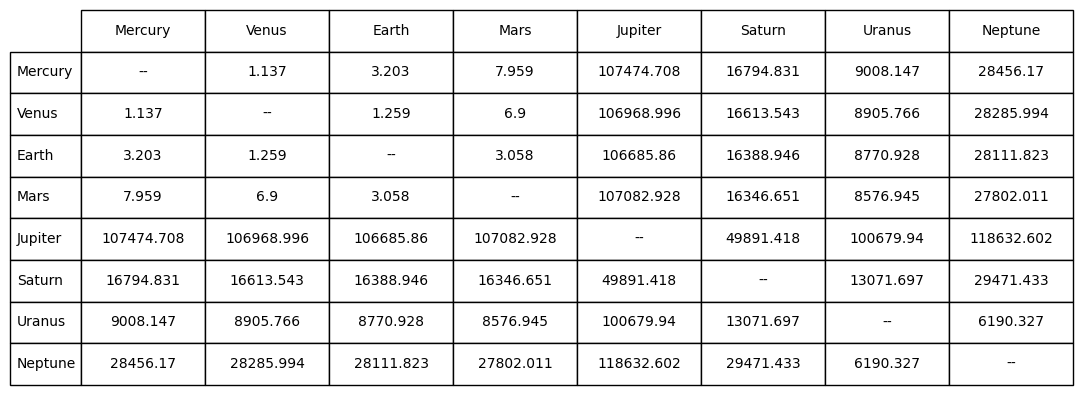

In [66]:
import numpy as np

def minkowskiDist(v1, v2, p):
    dist= 0.0
    for i in range(len(v1)):
        dist+= abs(v1[i] -v2[i])**p
    return dist


class planet(object):
    def __init__(self, name, features):
        self.name = name
        self.features= np.array(features)
    
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        return minkowskiDist(self.getFeatures(), other.getFeatures(), 2)

    def _str_(self):
        return self.name
Mercury = planet('Mercury', [0.38,0.06,0.39,0.25,0])
Venus = planet('Venus', [0.94,0.82,0.72,0.62,0])
Earth = planet('Earth', [1,1,1,1,1])
Mars = planet('Mars', [0.53,0.11,1.52,1.88,2])
Jupiter = planet('Jupiter', [11.2,317.8,5.2,11.86,79])
Saturn = planet('Saturn', [9.45,95.2,9.54,29.46,82])
Uranus = planet('Uranus', [4,14.6,19.22,88,27])
Neptune = planet('Neptune', [3.88,17.22,30,164.8,14])
planets = [Mercury,Venus,Earth,Mars,Jupiter,Saturn,Uranus,Neptune]
import matplotlib.pyplot as plt

def compareplanets(planets, precision):
    """Assumes animals is a list of animals, precision an int>= 0
    Builds a table of Euclidean distance between each animal"""
    columnLabels= []
    for a in planets:
        columnLabels.append(a.getName())
    rowLabels= columnLabels[:]
    tableVals= []

    #Get distances between pairs of planets
    for a1 in planets:
        row = []
        for a2 in planets:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
   
    table = plt.table(rowLabels= rowLabels, colLabels= columnLabels, cellText= tableVals, cellLoc= 'center', loc= 'center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2, 2.5)
    plt.axis('off')
    plt.show()

compareplanets(planets, 3)

3.For the data Planet_data.csv Download Planet_data.csv, use the nearest neighbors approach (with an appropriate value for n_neighbors), to classify and print the Ring_Present variable for PlanetX that has the following features:  (3 points) 

In [67]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

  
# Loading data
Planet_data = pd.read_csv('Planet_data.csv')
  
# Create feature and target arrays
X = Planet_data[['Equatorial_diameter','Mass','Semi_Major_Axis','Orbital_Period','Confirmed_Moons']]
y = Planet_data[['Ring_Present']]
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=55)
  
knn = KNeighborsClassifier(n_neighbors=1)
  
knn.fit(X_train, y_train)
PlanetX = pd.DataFrame([[0.5,0.9,0.55,0.12,2]],columns=['Equatorial_diameter','Mass','Semi_Major_Axis','Orbital_Period','Confirmed_Moons'])
# Predict on dataset which model has not seen before
print(X_test,knn.predict(X_test))

print(PlanetX,knn.predict(PlanetX))

   Equatorial_diameter   Mass  Semi_Major_Axis  Orbital_Period  \
4                11.20  317.8              5.2           11.86   
7                 3.88   17.2             30.0          164.80   

   Confirmed_Moons  
4               79  
7               14   ['yes' 'yes']
   Equatorial_diameter  Mass  Semi_Major_Axis  Orbital_Period  Confirmed_Moons
0                  0.5   0.9             0.55            0.12                2 ['no']


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Q4 For the taxi dataset provided in Q1, consider 'color' as a dependent variable and 'passengers', 'distance', 'fare', 'tip', 'tolls', and 'total' as independent variables. Perform logistic regression and predict the 'color' for the following feature set. (3 points)

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
  
Taxi_data = pd.read_csv('taxis_data.csv')
  

X = Taxi_data[['passengers','distance','fare','tip','tolls','total']]
y = Taxi_data[['color']]
  

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=50)


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

color_Pred = pd.DataFrame([[2,1.5,5.25,2,1.25,11.75]], columns =['passengers','distance','fare','tip','tolls','total'])
COLOR_pred = classifier.predict(color_Pred)
print('Predicted Colour for the given input=',COLOR_pred)

Confusion Matrix : 
 [[34  0]
 [ 5  1]]
Predicted Colour for the given input= ['green']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q5. Build a ROC curve for predicting 'color'. (3 points)

In [80]:
r_probs = [0 for _ in range(len(y_test))]
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,r_probs)
print('Random prediction: AUROC = %.3f' % (r_auc))

Random prediction: AUROC = 0.500
